## Задача 5 - Задача построения распределения ##

Новиков Евгений 120м

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

rcParams['figure.figsize'] = 8, 8
sns.set_theme()

Заргрузка данных и парсинг

In [11]:
df = pd.read_table('i-1572__i3d.txt', encoding = 'cp1251')
col = str(df.iloc[2][0])
colums = col.split(',')
#del colums[0]
colums = np.array(colums)
data = df['Results of individual 3D analysis'].iloc[5:].str.split(',', expand=True)
data.columns = colums
data.drop('#', axis = 1, inplace = True)
data.drop('', axis = 1, inplace = True)

Два интересующих столбца необходимо перевести в числовой формат, чтобы с ними можно было удобно работать

In [12]:
data['Volume-equivalent sphere diameter'] = pd.to_numeric(data['Volume-equivalent sphere diameter'])
data['Object volume'] = pd.to_numeric(data['Object volume'])

In [13]:
data.head(50)

,Object volume,Object surface,Volume of pores,Surface of pores,Porosity,Number of pores,Centroid x,Centroid y,Centroid z,Moment of inertia (x),...,Major diameter,Volume-equivalent sphere diameter,Surface-equivalent sphere diameter,Sauter diameter,Sphericity,Mean density,Maximum density,Surface convexity index,Euler number,Connectivity
5,0.00732,0.21566,0.00000,0.00000,0.0000,0,276.99365,242.06069,5.99859,0.00000,...,,0.24093,0.26200,0.20372,0.84558,n/a,n/a,,1,0
6,0.02929,0.56782,0.00000,0.00000,0.0000,0,271.34792,242.94284,5.99859,0.00274,...,,0.38245,0.42514,0.30949,0.80924,n/a,n/a,,1,0
7,0.00732,0.21566,0.00000,0.00000,0.0000,0,276.99365,242.76641,5.99859,0.00000,...,,0.24093,0.26200,0.20372,0.84558,n/a,n/a,,1,0
8,0.00732,0.21566,0.00000,0.00000,0.0000,0,277.69936,242.76641,5.99859,0.00000,...,,0.24093,0.26200,0.20372,0.84558,n/a,n/a,,1,0
9,0.00732,0.21566,0.00000,0.00000,0.0000,0,270.64220,243.11927,5.99859,0.00000,...,,0.24093,0.26200,0.20372,0.84558,n/a,n/a,,1,0
10,0.00732,0.21566,0.00000,0.00000,0.0000,0,271.70078,243.47212,5.99859,0.00000,...,,0.24093,0.26200,0.20372,0.84558,n/a,n/a,,1,0
11,0.00732,0.21566,0.00000,0.00000,0.0000,0,276.64079,243.47212,5.99859,0.00000,...,,0.24093,0.26200,0.20372,0.84558,n/a,n/a,,1,0
12,0.02929,0.56782,0.00000,0.00000,0.0000,0,270.28934,244.35427,5.99859,0.00274,...,,0.38245,0.42514,0.30949,0.80924,n/a,n/a,,1,0
13,0.02929,0.56782,0.00000,0.00000,0.0000,0,274.87650,244.35427,5.99859,0.00274,...,,0.38245,0.42514,0.30949,0.80924,n/a,n/a,,1,0
14,0.02929,0.56782,0.00000,0.00000,0.0000,0,271.70078,245.05999,5.99859,0.00274,...,,0.38245,0.42514,0.30949,0.80924,n/a,n/a,,1,0


Гистограмма по умолчанию строится по количетсву образцов, а нам нужно получить процентное cоотношение, так что нужно его посчитать отдельно.

In [14]:
weights = np.ones_like(data['Volume-equivalent sphere diameter'])/float(len(data['Volume-equivalent sphere diameter']))*100

Теперь можно строить диаграмму

График в следующем блоке нам не нужен, из него просто возьмутся и запишутся в переменную значения counts_1, сам график не особо интересен, здесь лишь частота встречаемости разных значений

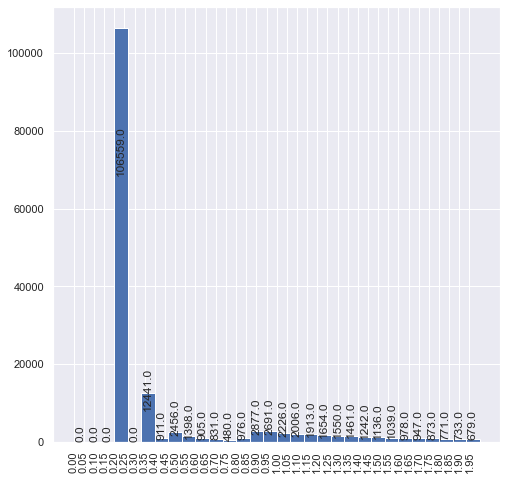

In [15]:
fig, ax = plt.subplots()
counts_1, bins, patches = ax.hist(data['Volume-equivalent sphere diameter'], bins = 30, range = (0, 2));

bin_centers = 0.5 * np.diff(bins) + bins[:-1]
plt.xticks(np.arange(0, 2, 0.05), rotation = 90)
#plt.yticks(np.arange(0, 101, 20))
labels = []
for count, x in zip(counts_1, bin_centers):
    # Label the raw counts
    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, count/400), textcoords='offset points', va='bottom', ha='center', rotation = 90)

Значения counts_1 возьмем из прошлого графика, чтобы показать не процентное содержание, а численное

Итоговый график

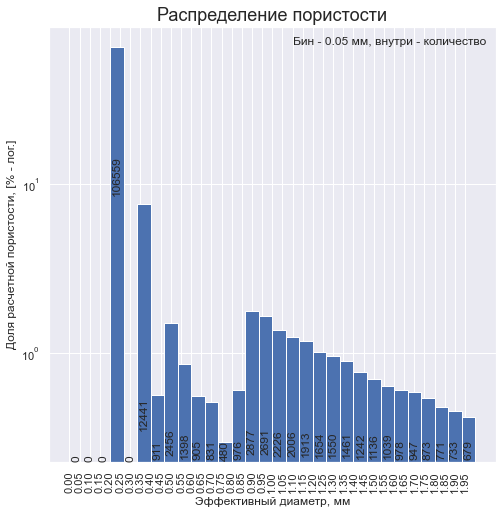

In [21]:
fig, ax = plt.subplots()
counts_2, bins, patches = plt.hist(data['Volume-equivalent sphere diameter'], weights=weights,bins = 30, range = (0, 2), log = True)
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
plt.xticks(np.arange(0, 2, 0.05), rotation = 90)
#plt.yticks(np.arange(0, 101, 20))
for count, x in zip(counts_1, bin_centers):
    # Label the raw counts
    ax.annotate(str(int(count)), xy=(x, 0), xycoords=('data', 'axes fraction'),
        xytext=(0, count/400), textcoords='offset points', va='bottom', ha='center', rotation = 90)
    
plt.xlabel('Эффективный диаметр, мм');
plt.ylabel('Доля расчетной пористости, [% - лог.]');
plt.title('Распределение пористости', fontsize = 18);
plt.annotate('Бин - 0.05 мм, внутри - количество', xy = (1.1, 67));

Вывод: Значения распределения можно видеть на графике выше. В принципе, если необходимо, можно просуммировать все значения более 1 мм, однако тогда часть информации потеряется. 